In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [22]:
def plot_data(data):
    # Create a subplot for each category
    fig, axs = plt.subplots(3, 2, figsize=(12, 15))

    # Define categories
    categories = ["AP", "AP50", "AP75", "bdry", "iou", "dice"]

    # Define colors and labels
    colors = ['skyblue', 'olivedrab', 'coral', 'red']
    labels = ['24 epochs', '100 epochs', '120 epochs', 'new120 epochs']

    # Prepare legend elements manually
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                       for c in colors]

    # Loop over categories
    for ax, category in zip(axs.flatten(), categories):
        ax.set_title(category)
        ax.set_ylabel('mu')
        ax.set_xticks(range(len(df.index)))
        ax.set_xticklabels(df.index, rotation=45)

        model_names = df.index

        for i in range(0, len(model_names), 3):
    #         ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
    #                     yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
    #                     fmt='o', capsize=4, color=colors[i//3])
            ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], ('mu', category)], 
                        yerr=df.loc[model_names[i:i+3], ('delta_mu', category)], 
                        fmt='o', capsize=4, color=colors[i//3])

    # Create a global legend
    fig.legend(legend_elements, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

# Surgical

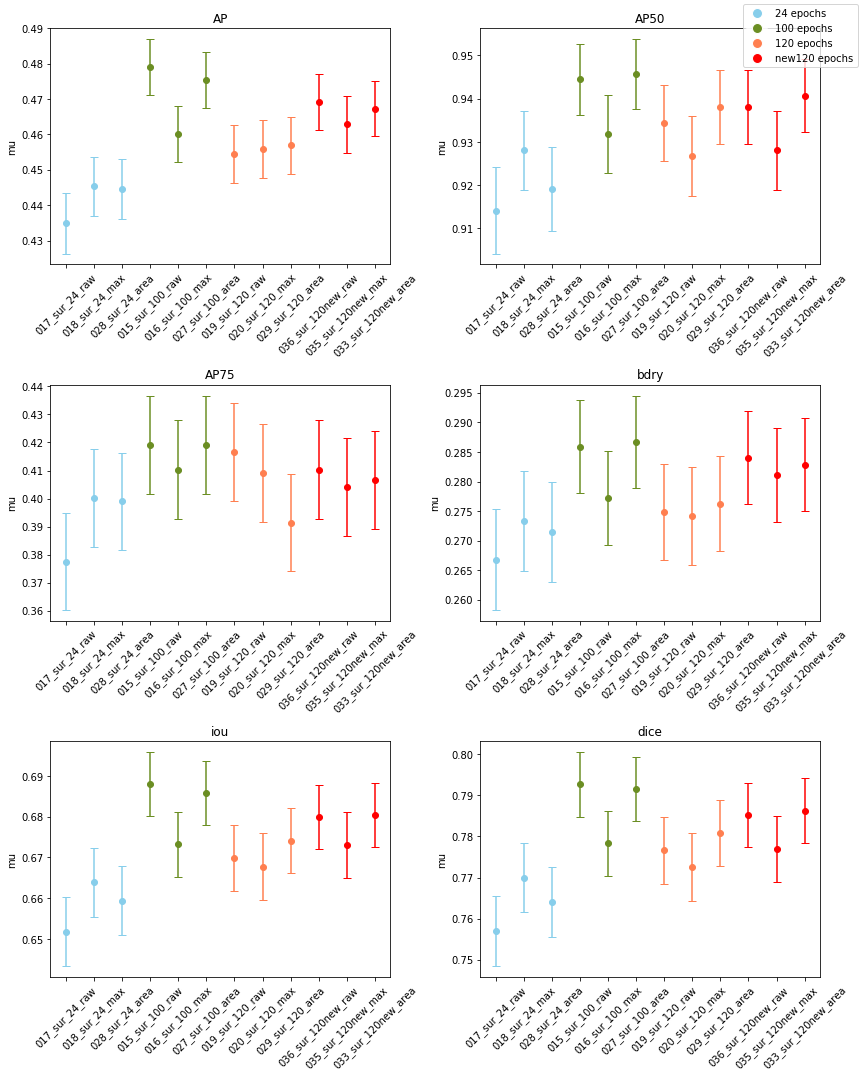

In [25]:
data = """
/	mu	mu	mu	mu	mu	mu	std	std	std	std	std	std	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu
/	AP	AP50	AP75	bdry	iou	dice	AP	AP50	AP75	bdry	iou	dice	AP	AP50	AP75	bdry	iou	dice
017_sur_24_raw	0.43484848 	0.91414141 	0.37752525 	0.26678027 	0.65179914 	0.75693077 	0.23999100 	0.28033215 	0.48507425 	0.23999100 	0.23999100 	0.23999100 	0.00852771 	0.00996117 	0.01723636 	0.00852771 	0.00852771 	0.00852771 
018_sur_24_max	0.44532828 	0.92803030 	0.40025253 	0.27329403 	0.66388157 	0.77000752 	0.23676794 	0.25860104 	0.49025903 	0.23676794 	0.23676794 	0.23676794 	0.00841318 	0.00918899 	0.01742060 	0.00841318 	0.00841318 	0.00841318 
028_sur_24_area	0.44469697 	0.91919192 	0.39898990 	0.27141604 	0.65941556 	0.76405000 	0.23914546 	0.27271237 	0.49000012 	0.23914546 	0.23914546 	0.23914546 	0.00849766 	0.00969041 	0.01741140 	0.00849766 	0.00849766 	0.00849766 
015_sur_100_raw	0.47904040 	0.94444444 	0.41919192 	0.28586306 	0.68800471 	0.79263809 	0.22173911 	0.22920617 	0.49373865 	0.22173911 	0.22173911 	0.22173911 	0.00787916 	0.00814449 	0.01754424 	0.00787916 	0.00787916 	0.00787916 
016_sur_100_max	0.46022727 	0.93181818 	0.41035354 	0.27719302 	0.67325655 	0.77832132 	0.22334419 	0.25221693 	0.49220870 	0.22334419 	0.22334419 	0.22334419 	0.00793619 	0.00896214 	0.01748987 	0.00793619 	0.00793619 	0.00793619 
027_sur_100_area	0.47537879 	0.94570707 	0.41919192 	0.28670380 	0.68576411 	0.79151052 	0.22087599 	0.22673800 	0.49373865 	0.22087599 	0.22087599 	0.22087599 	0.00784849 	0.00805678 	0.01754424 	0.00784849 	0.00784849 	0.00784849 
019_sur_120_raw	0.45441919 	0.93434343 	0.41666667 	0.27477320 	0.66989529 	0.77663048 	0.22829144 	0.24783732 	0.49331819 	0.22829144 	0.22829144 	0.22829144 	0.00811198 	0.00880652 	0.01752930 	0.00811198 	0.00811198 	0.00811198 
020_sur_120_max	0.45593434 	0.92676768 	0.40909091 	0.27418104 	0.66774946 	0.77255295 	0.23204720 	0.26068209 	0.49197677 	0.23204720 	0.23204720 	0.23204720 	0.00824544 	0.00926293 	0.01748163 	0.00824544 	0.00824544 	0.00824544 
029_sur_120_area	0.45694444 	0.93813131 	0.39141414 	0.27622601 	0.67412029 	0.78074695 	0.22611378 	0.24106914 	0.48837512 	0.22611378 	0.22611378 	0.22611378 	0.00803460 	0.00856602 	0.01735365 	0.00803460 	0.00803460 	0.00803460 
036_sur_120new_raw	0.46919192 	0.93813131 	0.41035354 	0.28405853 	0.68001610 	0.78513982 	0.22041302 	0.24106914 	0.49220870 	0.22041302 	0.22041302 	0.22041302 	0.00783204 	0.00856602 	0.01748987 	0.00783204 	0.00783204 	0.00783204 
035_sur_120new_max	0.46287879 	0.92803030 	0.40404040 	0.28113114 	0.67306595 	0.77686848 	0.22489957 	0.25860104 	0.49101545 	0.22489957 	0.22489957 	0.22489957 	0.00799146 	0.00918899 	0.01744747 	0.00799146 	0.00799146 	0.00799146 
033_sur_120new_area	0.46729798 	0.94065657 	0.40656566 	0.28281135 	0.68050733 	0.78626153 	0.22131379 	0.23641566 	0.49150284 	0.22131379 	0.22131379 	0.22131379 	0.00786404 	0.00840066 	0.01746479 	0.00786404 	0.00786404 	0.00786404 

"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df
plot_data(data)

In [16]:
def plot_data(data):
    # Create a subplot for each category
    fig, axs = plt.subplots(3, 2, figsize=(12, 15))

    # Define categories
    categories = ["AP", "AP50", "AP75", "bdry", "iou", "dice"]

    # Define colors and labels
#     colors = ['skyblue', 'olivedrab', 'coral', 'red']
#     labels = ['24 epochs', '100 epochs', '120 epochs', 'new120 epochs']

    # Prepare legend elements manually
#     legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
#                        for c in colors]

    # Loop over categories
    for ax, category in zip(axs.flatten(), categories):
        ax.set_title(category)
        ax.set_ylabel('mu')
        ax.set_xticks(range(len(df.index)))
        ax.set_xticklabels(df.index, rotation=45)

        model_names = df.index

        for i in range(0, len(model_names), 3):
    #         ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
    #                     yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
    #                     fmt='o', capsize=4, color=colors[i//3])
            ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], ('mu', category)], 
                        yerr=df.loc[model_names[i:i+3], ('delta_mu', category)], 
                        fmt='o', capsize=4, color='r')

    # Create a global legend
#     fig.legend(legend_elements, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

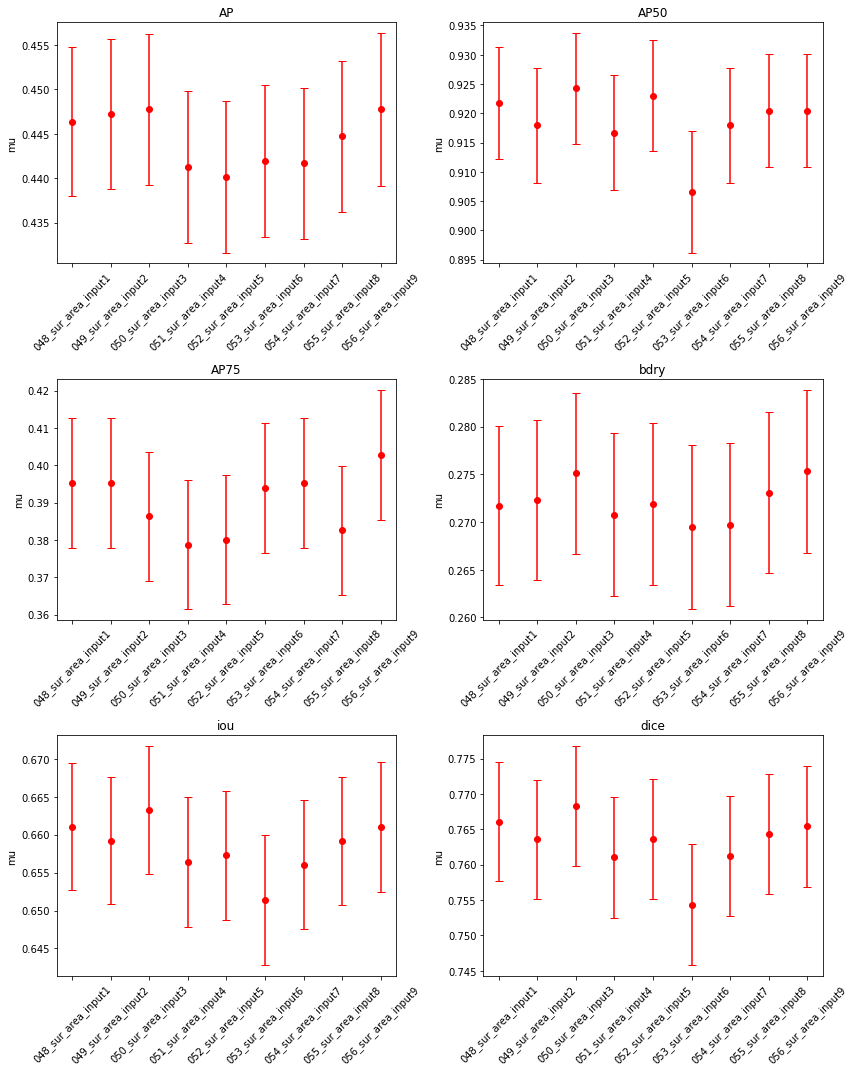

In [19]:
data = """
/	mu	mu	mu	mu	mu	mu	mu	std	std	std	std	std	std	std	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu
/	AP	AP50	AP75	AP90	bdry	iou	dice	AP	AP50	AP75	AP90	bdry	iou	dice	AP	AP50	AP75	AP90	bdry	iou	dice
048_sur_area_input1	0.44633838383838415	0.9217171717171717	0.3952020202020202	0.0	0.27173276618123055	0.661057857928252	0.7660860260478174	0.23555454465124487	0.268785874967658	0.4892029789208603	0.0	0.23555454465124487	0.23555454465124487	0.23555454465124487	0.008370066276744172	0.00955089018156237	0.017383070924871	0.0	0.008370066276744172	0.008370066276744172	0.008370066276744172
049_sur_area_input2	0.44722222222222185	0.9179292929292929	0.3952020202020202	0.0	0.27235686126806113	0.6592223632215249	0.7635661489283195	0.23604915194749423	0.2746458564188511	0.48920297892086023	0.0	0.23604915194749423	0.23604915194749423	0.23604915194749423	0.008387641381723352	0.009759115555433196	0.017383070924871	0.0	0.008387641381723352	0.008387641381723352	0.008387641381723352
050_sur_area_input3	0.4477272727272729	0.9242424242424242	0.38636363636363635	0.0025252525252525255	0.27510312209470256	0.6632107360796495	0.7683081474117558	0.23781535478617088	0.2647770463355486	0.48722326227101775	0.05022011593160546	0.23781535478617088	0.23781535478617088	0.23781535478617088	0.008450400666795881	0.009408442658876937	0.017312724756883075	0.0017844941153466816	0.008450400666795881	0.008450400666795881	0.008450400666795881
051_sur_area_input4	0.44128787878787823	0.9166666666666666	0.3787878787878788	0.003787878787878788	0.2707665222320668	0.6563674628433555	0.7610384209288491	0.24041653267371685	0.276560050334846	0.48539170044587304	0.06146788872796098	0.24041653267371685	0.24041653267371685	0.24041653267371685	0.008542829498294742	0.009827133474455475	0.01724764304135467	0.002184166318278039	0.008542829498294742	0.008542829498294742	0.008542829498294742
052_sur_area_input5	0.4401515151515152	0.922979797979798	0.380050505050505	0.0012626262626262627	0.2719064250428493	0.6572928131379262	0.7636529965834185	0.23947683660327077	0.2667919820097465	0.4857056565490957	0.03553345272593492	0.23947683660327077	0.23947683660327077	0.23947683660327077	0.0085094388523988	0.009480040280401848	0.01725879898570655	0.0012626262626262573	0.0085094388523988	0.0085094388523988	0.0085094388523988
053_sur_area_input6	0.4419191919191922	0.9065656565656566	0.3939393939393939	0.0	0.2694615399972959	0.6513495975823114	0.7543353871865706	0.2411736023765668	0.291224058189031	0.48893044742152775	0.0	0.2411736023765668	0.2411736023765668	0.2411736023765668	0.0085697307987912	0.010348196304314898	0.01737338693972314	0.0	0.0085697307987912	0.0085697307987912	0.0085697307987912
054_sur_area_input7	0.4416666666666666	0.9179292929292929	0.3952020202020202	0.0025252525252525255	0.2697272073828663	0.6560631711976697	0.7612496678425809	0.23985088077036915	0.27464585641885086	0.4892029789208604	0.050220115931605504	0.23985088077036915	0.23985088077036915	0.23985088077036915	0.008522729933127802	0.00975911555543319	0.017383070924871007	0.001784494115346683	0.008522729933127802	0.008522729933127802	0.008522729933127802
055_sur_area_input8	0.44469696969696976	0.9204545454545454	0.38257575757575757	0.0025252525252525255	0.27308499672440717	0.6591836934288343	0.7643105033973251	0.23813892638294257	0.27075919009057425	0.48632311403498374	0.05022011593160539	0.23813892638294257	0.23813892638294257	0.23813892638294257	0.008461898282833223	0.00962100888119589	0.017280739382091626	0.001784494115346679	0.008461898282833223	0.008461898282833223	0.008461898282833223
056_sur_area_input9	0.44772727272727275	0.9204545454545454	0.4027777777777778	0.0025252525252525255	0.275308199377373	0.6609496855073504	0.7654100728757454	0.24098383758224337	0.27075919009057425	0.4907666915123339	0.050220115931605504	0.24098383758224337	0.24098383758224337	0.24098383758224337	0.00856298780044306	0.00962100888119589	0.017438635032317077	0.001784494115346683	0.00856298780044306	0.00856298780044306	0.00856298780044306
"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df
plot_data(data)

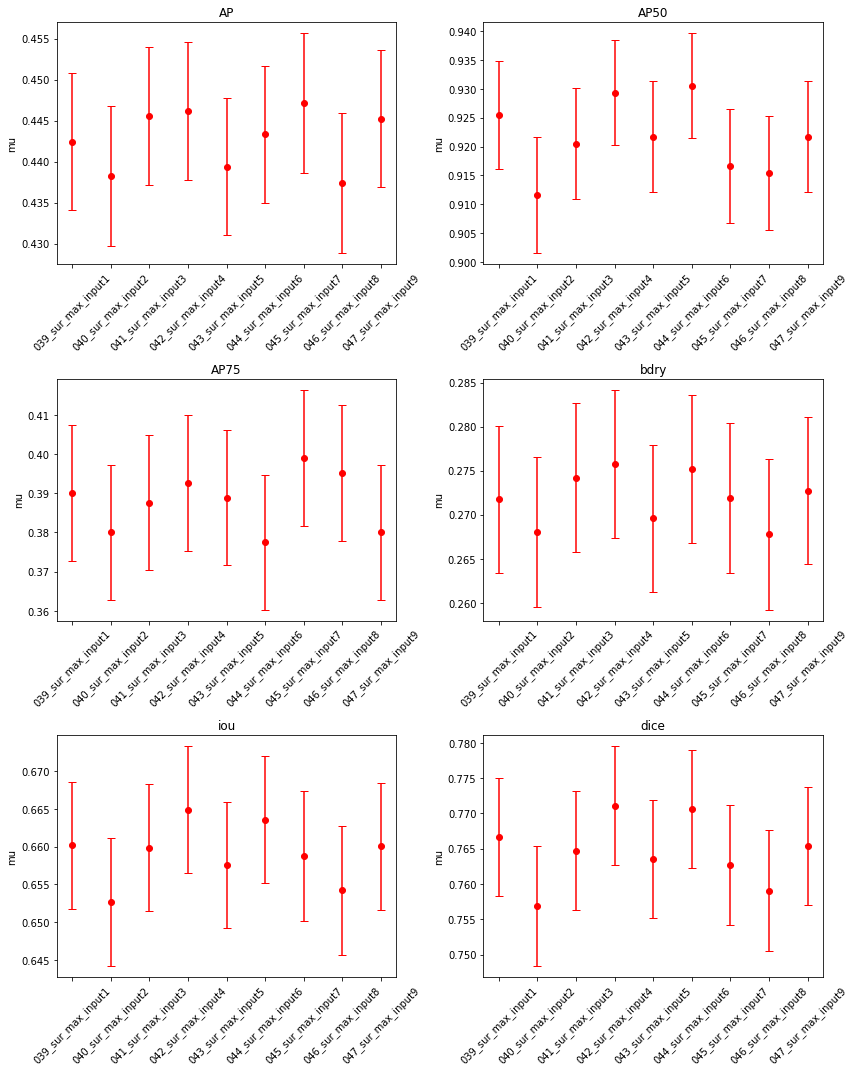

In [21]:
data = """
/	mu	mu	mu	mu	mu	mu	mu	std	std	std	std	std	std	std	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu	delta_mu
/	AP	AP50	AP75	AP90	bdry	iou	dice	AP	AP50	AP75	AP90	bdry	iou	dice	AP	AP50	AP75	AP90	bdry	iou	dice
039_sur_max_input1	0.4424242424242426	0.9255050505050505	0.39015151515151514	0.0025252525252525255	0.271729980473115	0.6601499025568818	0.7666347542344921	0.23615800024630854	0.26274058382099313	0.48809231813430365	0.050220115931605504	0.23615800024630854	0.23615800024630854	0.23615800024630854	0.008391509137603568	0.009336080114387841	0.01734360531231734	0.001784494115346683	0.008391509137603568	0.008391509137603568	0.008391509137603568
040_sur_max_input2	0.4382575757575754	0.9116161616161617	0.380050505050505	0.0012626262626262627	0.2679857429013484	0.6526995141698857	0.7568837362858984	0.23939133589126524	0.2840316823933535	0.4857056565490957	0.03553345272593503	0.23939133589126524	0.23939133589126524	0.23939133589126524	0.008506400716890718	0.010092626358992033	0.01725879898570655	0.001262626262626261	0.008506400716890718	0.008506400716890718	0.008506400716890718
041_sur_max_input3	0.44558080808080763	0.9204545454545454	0.38762626262626265	0.0012626262626262627	0.2741877954462637	0.6598490485639283	0.7647233193721434	0.23741265698023648	0.27075919009057425	0.48751639393322055	0.03553345272593492	0.23741265698023648	0.23741265698023648	0.23741265698023648	0.008436091423345872	0.00962100888119589	0.017323140736944433	0.0012626262626262573	0.008436091423345872	0.008436091423345872	0.008436091423345872
042_sur_max_input4	0.4462121212121214	0.9292929292929293	0.3926767676767677	0.0025252525252525255	0.2757655464376163	0.6648864192944585	0.7710979323495518	0.23673035214211724	0.25649688080256783	0.48865449733479344	0.05022011593160553	0.23673035214211724	0.23673035214211724	0.23673035214211724	0.008411846776635886	0.009114219788347847	0.017363581480361448	0.001784494115346684	0.008411846776635886	0.008411846776635886	0.008411846776635886
043_sur_max_input5	0.43939393939393984	0.9217171717171717	0.3888888888888889	0.0	0.26957369841296563	0.6575644467816208	0.7635904661182201	0.23523640929184833	0.26878587496765777	0.4878060771743462	0.0	0.23523640929184833	0.23523640929184833	0.23523640929184833	0.008358761828990606	0.009550890181562363	0.017333434182698466	0.0	0.008358761828990606	0.008358761828990606	0.008358761828990606
044_sur_max_input6	0.44330808080808104	0.9305555555555556	0.37752525252525254	0.0	0.2751905204954021	0.6635753823952242	0.770625735623668	0.23527301522250127	0.25436904304099484	0.4850742504386548	0.0	0.23527301522250127	0.23527301522250127	0.23527301522250127	0.008360062564096951	0.009038610365838534	0.01723636294653033	0.0	0.008360062564096951	0.008360062564096951	0.008360062564096951
045_sur_max_input7	0.44709595959595994	0.9166666666666666	0.398989898989899	0.0012626262626262627	0.27191553254978673	0.658754231427053	0.7626618709076535	0.24050442331109134	0.27656005033484593	0.49000011857785297	0.03553345272593492	0.24050442331109134	0.24050442331109134	0.24050442331109134	0.008545952556102942	0.009827133474455471	0.017411396049188718	0.0012626262626262573	0.008545952556102942	0.008545952556102942	0.008545952556102942
046_sur_max_input8	0.4373737373737379	0.9154040404040404	0.3952020202020202	0.0012626262626262627	0.26777503943785724	0.6541910842061043	0.7590296363288705	0.24066316241121516	0.2784553536086412	0.4892029789208603	0.03553345272593492	0.24066316241121516	0.24066316241121516	0.24066316241121516	0.008551593104412948	0.009894480143736187	0.017383070924871	0.0012626262626262573	0.008551593104412948	0.008551593104412948	0.008551593104412948
047_sur_max_input9	0.4452020202020201	0.9217171717171717	0.380050505050505	0.0025252525252525255	0.2727410381405868	0.6600308730596244	0.765409646010158	0.23526558593452843	0.2687858749676583	0.4857056565490957	0.050220115931605504	0.23526558593452843	0.23526558593452843	0.23526558593452843	0.008359798575843982	0.009550890181562383	0.01725879898570655	0.001784494115346683	0.008359798575843982	0.008359798575843982	0.008359798575843982

"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df
plot_data(data)